# Week 5  in-class activities/Lab (IS 733)

**Task1: Understanding Naive Bayes and K-nearest neighbors**

1b. write code (with AI assistant) to build a naive Bayes and KNN classifier. You can use the spam_dataset.csv to test it out.

In [1]:
pip install scikit-learn

In [28]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

# Load the dataset
data = pd.read_csv("spam_dataset.csv")

# Split the dataset into features and labels
X = data[['word1', 'word2', 'word3', 'word4']]
y = data['spam']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Naive Bayes Classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)  # Note: No need to use CountVectorizer as the data is already in the desired format
nb_predictions = nb_classifier.predict(X_test)

# K-Nearest Neighbors Classifier
knn_classifier = KNeighborsClassifier(n_neighbors=8)  # You can adjust the number of neighbors (k) as needed
knn_classifier.fit(X_train, y_train)
knn_predictions = knn_classifier.predict(X_test)

# Evaluate the classifiers
nb_accuracy = accuracy_score(y_test, nb_predictions)
knn_accuracy = accuracy_score(y_test, knn_predictions)

print("Naive Bayes Classifier Accuracy:", nb_accuracy)
print("K-Nearest Neighbors Classifier Accuracy:", knn_accuracy)

# Classification Report for Naive Bayes
nb_report = classification_report(y_test, nb_predictions)
print("\nNaive Bayes Classification Report:")
print(nb_report)

# Classification Report for K-Nearest Neighbors
knn_report = classification_report(y_test, knn_predictions)
print("\nK-Nearest Neighbors Classification Report:")
print(knn_report)

Naive Bayes Classifier Accuracy: 0.4
K-Nearest Neighbors Classifier Accuracy: 0.6

Naive Bayes Classification Report:
              precision    recall  f1-score   support

           0       0.44      0.80      0.57         5
           1       0.00      0.00      0.00         5

    accuracy                           0.40        10
   macro avg       0.22      0.40      0.29        10
weighted avg       0.22      0.40      0.29        10


K-Nearest Neighbors Classification Report:
              precision    recall  f1-score   support

           0       0.57      0.80      0.67         5
           1       0.67      0.40      0.50         5

    accuracy                           0.60        10
   macro avg       0.62      0.60      0.58        10
weighted avg       0.62      0.60      0.58        10



**Task2: Understanding ROC and AUC**

2b. Write code (with AI assistant) to fit the model using your favorite classifier (NB, KNN, or Decision tree); using the spam_dataset.csv, ask to output an ROC curve and AUC score. (Hint: if you fit a decision tree, you might want to reduce max_depth)

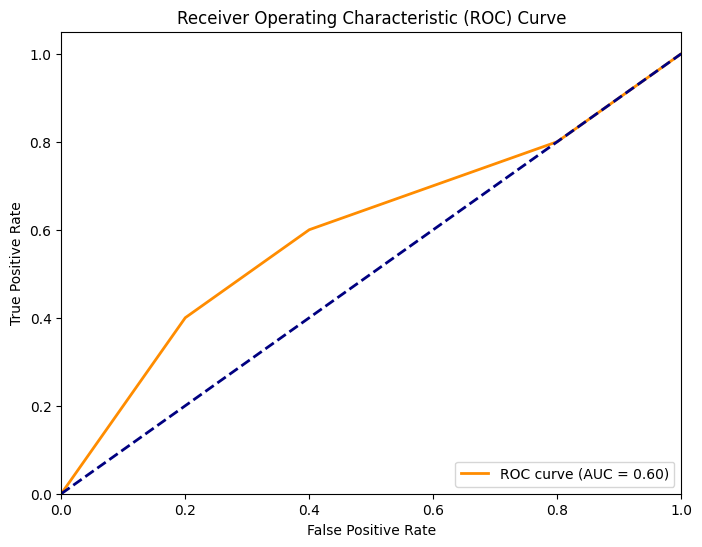

AUC Score: 0.60


In [36]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('spam_dataset.csv')

# Split the dataset into features (X) and labels (y)
X = df[['word1', 'word2', 'word3', 'word4']]  # Assuming these are your feature columns
y = df['spam']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Increase the max_depth to create a deeper Decision Tree
max_depth = 2  # Increase this value

decision_tree_classifier = DecisionTreeClassifier(max_depth=max_depth)
decision_tree_classifier.fit(X_train, y_train)

# Predict probabilities for the positive class (spam)
y_prob = decision_tree_classifier.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Output AUC score
print(f'AUC Score: {roc_auc:.2f}')